# Introduction to scikit learn (sklearn)

In [1]:
what_were_covering = ["0. An end-to-end Scikit-Learn Workflow",
"1. Getting the data ready",
"2. Choose the right estimator/ algorithm",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!"]


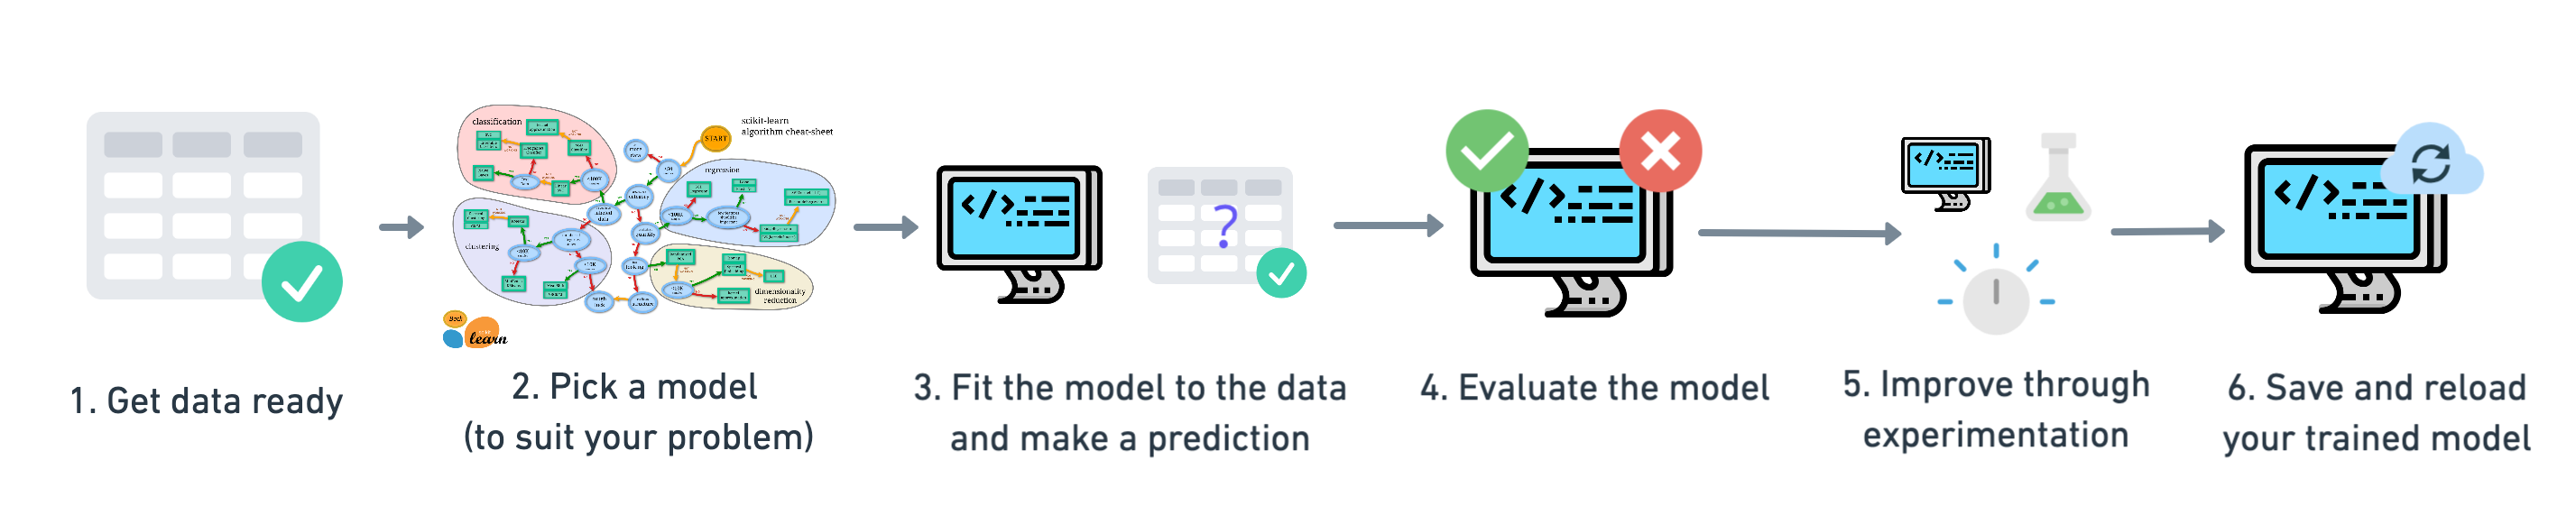

In [2]:
from IPython import display
display.Image("sklearn-workflow.png")

# An end-to-end Scikit learn workkflow

In [3]:
# Get the data ready
import numpy as np
import pandas as pd

heart_disease = pd.read_csv("heart-disease (1).csv")

In [4]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

----------------------------------------------------------

We have to create two variables X and Y

X is features matrix

y is the label matrix

-------------------------------------------------------


In [5]:
#create X (features matrix)

X = heart_disease.drop("target", axis =1)

y = heart_disease.target


# Used to Remove all sorts of warnings

In [6]:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

In [7]:
# Choose the right model and hyperparameters
# our problem is a classification problem

#RandomForestClassifier 
'''
:--> classification Machine learning Model 
:--> capable of learning pattern in data,
:--> classifing a row is one thing or an another thing
'''

from sklearn.ensemble import RandomForestClassifier

#clf  :--> classifier in scikit learn
#     :--> here clf is an instance (object) of the of class RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100) 

# We'll keep the default hyperparameter

clf.get_params() # returns all the paramters used by the model



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# test_size :--> ie., 20% is test_data 
#                     80% is train_data

In [9]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2


In [10]:
# fit :--> tells the classification model RandomForest to find the patterns in the training data
clf.fit(X_train, y_train);

In [11]:
# make a  prediction
y_label = clf.predict(np.array([0,2,3,4]))

# Error because our model is based on a structured parameter but the input we provided doesnt match

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
y_preds = clf.predict(X_test)

In [13]:
y_preds

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [14]:
y_test

144    1
146    1
241    0
29     1
88     1
      ..
62     1
10     1
176    0
104    1
178    0
Name: target, Length: 61, dtype: int64

In [15]:
# Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [16]:
clf.score(X_test, y_test)

0.8524590163934426

In [17]:
# evaluation

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        25
           1       0.91      0.83      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [18]:
confusion_matrix(y_test, y_preds)

array([[22,  3],
       [ 6, 30]], dtype=int64)

In [19]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [20]:
# improve the model
# Try different amount of n_estimators (hyperparameters)

np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f} %")

Trying model with 10 estimators...
Model accuracy on test set: 80.33 %
Trying model with 20 estimators...
Model accuracy on test set: 80.33 %
Trying model with 30 estimators...
Model accuracy on test set: 80.33 %
Trying model with 40 estimators...
Model accuracy on test set: 85.25 %
Trying model with 50 estimators...
Model accuracy on test set: 85.25 %
Trying model with 60 estimators...
Model accuracy on test set: 83.61 %
Trying model with 70 estimators...
Model accuracy on test set: 83.61 %
Trying model with 80 estimators...
Model accuracy on test set: 85.25 %
Trying model with 90 estimators...
Model accuracy on test set: 83.61 %


In [21]:
#save the model and load it

import pickle

pickle.dump(clf, open("random_forest_classification.pkl", "wb"))

In [22]:
loaded_model = pickle.load(open("random_forest_classification.pkl", "rb"))

In [23]:
loaded_model

RandomForestClassifier(n_estimators=90)

In [24]:
loaded_model.score(X_test, y_test)

0.8360655737704918

In [25]:
# 1. Get the model ready
from sklearn.ensemble import RandomForestClassifier

# 2. Create the class instance for the model
clf = RandomForestClassifier()

# 3. Fit the data to model
#      3a. spliting the data into test and train data
#             3aa. Loading the dataset
import pandas as pd
heart_disease = pd.read_csv("heart-disease (1).csv")

X = heart_disease.drop("target", axis=1)  # fetching the data
y = heart_disease.target         #identifying the Feature-Matrix (X) & Label-Matrix (y)

from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size= 0.2)
 
clf.fit(X_train, y_train)

# 4. Prediction
y_preds = clf.predict(X_test)     # The predicted value for target is saved in target

# 5. Evaluate the correctness or confidence

clf.score(X_train, y_train)
clf.score(X_test, y_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

classification_report(y_test, y_preds)
accuracy_score(y_test, y_preds)
confusion_matrix(y_test, y_preds)

# With the above evaluation we have to improve the model accuracy
# by changing "Hyperparameters"
#         :--> change n_estimators value
import numpy as np
np.random.seed(40)

for i in range(10,100,10):
    print(f"Trying with estimators {i}")
    # re-instantiate the model but with altered n_estimators
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy is {clf.score(X_test, y_test) *100}%")
    
# Saving the model
import pickle
pickle.dump(clf, open("First_model.pkl", "wb"))

# Retreving the saved model
loaded_model = pickle.load(open("First_model.pkl","rb"))


Trying with estimators 10
Model accuracy is 75.20661157024794%
Trying with estimators 20
Model accuracy is 76.44628099173553%
Trying with estimators 30
Model accuracy is 74.79338842975206%
Trying with estimators 40
Model accuracy is 77.68595041322314%
Trying with estimators 50
Model accuracy is 78.099173553719%
Trying with estimators 60
Model accuracy is 77.68595041322314%
Trying with estimators 70
Model accuracy is 78.51239669421489%
Trying with estimators 80
Model accuracy is 79.75206611570248%
Trying with estimators 90
Model accuracy is 76.85950413223141%


To check scikit learn version

In [26]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
executable: C:\ProgramData\Anaconda3\python.exe
   machine: Windows-10-10.0.19044-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 0.24.2
        numpy: 1.20.3
        scipy: 1.7.1
       Cython: 0.29.24
       pandas: 1.3.4
   matplotlib: 3.4.3
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


In [27]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Getting our data ready to be used with machine Learning

Three main things we have to do 

    1. Split the data into feature(X) and label(y) Matrix

    2. Filling or disregarding the missing values

    3. Converting non-numerical to numerial values (feature encoding)

In [28]:
heart_disease = pd.read_csv("heart-disease (1).csv")

In [29]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
X = heart_disease.drop("target", axis =1) # feature matrix

y = heart_disease.target # label matrix

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=.2)

In [32]:
heart_disease.shape

(303, 14)

In [33]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [34]:
y_train.shape, y_test.shape

((242,), (61,))

# Making sure its numerical


In [35]:
car_sales = pd.read_csv("scikit-learn-data/car-sales-extended.csv")

In [36]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [37]:
car_sales.shape

(1000, 5)

In [38]:
car_sales.Make.unique()

array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object)

In [39]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [40]:
#split data into feature and label matrix

X = car_sales.drop("Price", axis=1)
y = car_sales.Price

In [41]:
X,y

(       Make Colour  Odometer (KM)  Doors
 0     Honda  White          35431      4
 1       BMW   Blue         192714      5
 2     Honda  White          84714      4
 3    Toyota  White         154365      4
 4    Nissan   Blue         181577      3
 ..      ...    ...            ...    ...
 995  Toyota  Black          35820      4
 996  Nissan  White         155144      3
 997  Nissan   Blue          66604      4
 998   Honda  White         215883      4
 999  Toyota   Blue         248360      4
 
 [1000 rows x 4 columns],
 0      15323
 1      19943
 2      28343
 3      13434
 4      14043
        ...  
 995    32042
 996     5716
 997    31570
 998     4001
 999    12732
 Name: Price, Length: 1000, dtype: int64)

In [42]:
#Split into test and train set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [43]:
# RandomForestRegressor can predict numbers

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()


In [44]:
model.fit(X_train, y_train) #Error because ML model can only find patterns in numbers/numericals
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [50]:
# Make  it numeric

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()                 # turns categories into numbers.
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough") 
# Accepts
#     :-->list of tuples with names
#     :-->actual transformer to be used
#     :-->list of features we would like to transform

transformed_X = transformer.fit_transform(X)

In [51]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [52]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [53]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


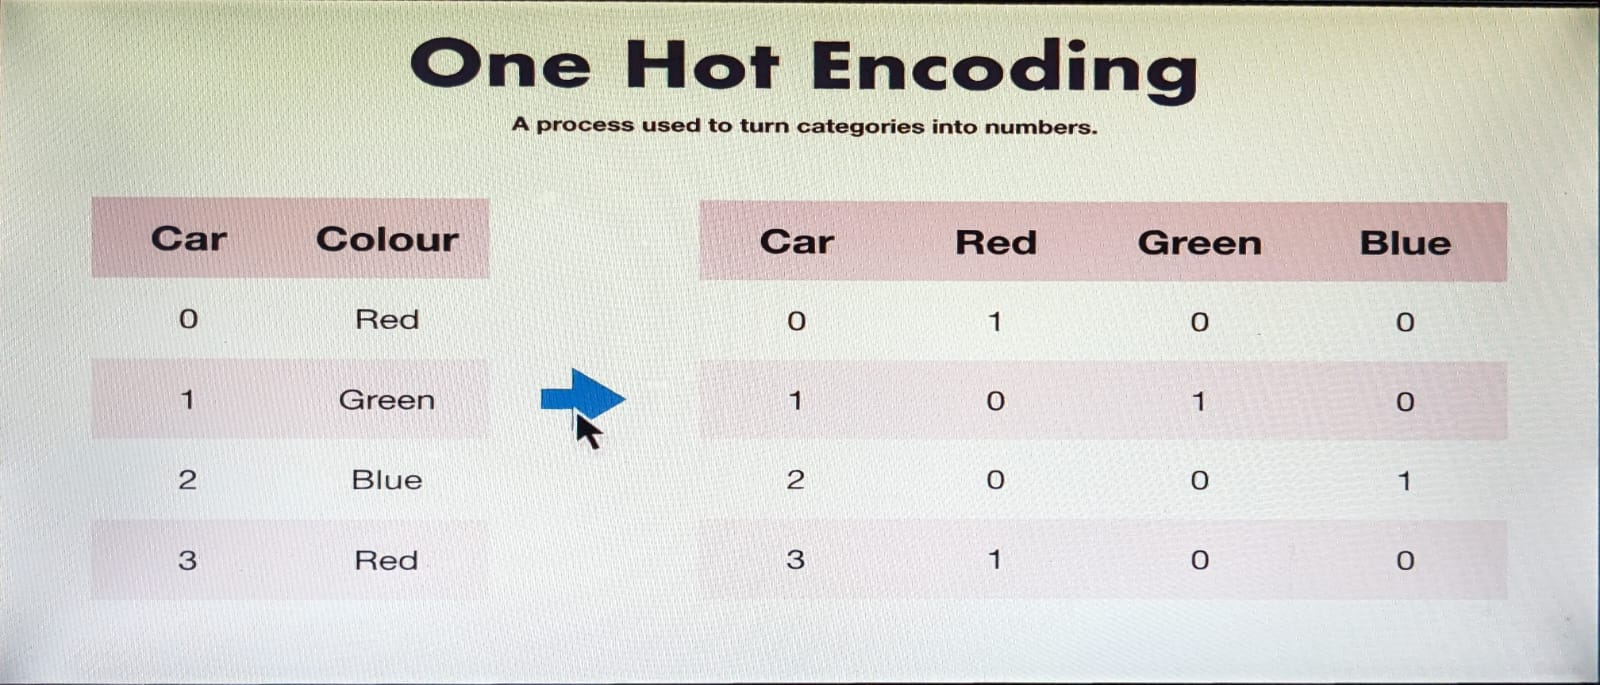

In [54]:
from IPython import display
display.Image("OneHotEncoding.jpg")

In [55]:
# Can also turn into numeric 
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [56]:
# Lets refit the model

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model.fit(X_train, y_train);

In [57]:
model.score(X_test, y_test)

0.3235867221569877

## what if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [58]:
car_missing_data = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")

In [59]:
car_missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [60]:
car_missing_data.shape


(1000, 5)

# Tells us how many missing values are there

In [61]:
car_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [62]:
car_missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [63]:
#lets make it numeric

X = car_missing_data.drop("Price", axis=1)
y = car_missing_data.Price

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)], 
                                remainder = "passthrough")

transformed_X = transformer.fit_transform(car_missing_data)

transformed_X

<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

# Note the previous version of sklearn did'nt support for data with "NaN"

So we can follow thw following approach if needed

# Say we want to fill the missing data with some value

# 1. using pandas

In [64]:
car_missing_data.Doors.value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [65]:
# Fill column

car_missing_data["Make"].fillna("missing", inplace = True)

car_missing_data["Colour"].fillna("missing", inplace = True)

car_missing_data["Doors"].fillna(4, inplace = True)

car_missing_data["Odometer (KM)"].fillna(car_missing_data["Odometer (KM)"].mean(), inplace = True)

#car_missing_data["Make"].fillna("missing", inplace = True)



In [66]:
car_missing_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [67]:
# Remove rows with missing Price Values
car_missing_data.dropna(inplace =True)

# Basically we set all the missing cells of the other rows with "missing"
# So there will only be NAn in Price column
# hence a simple car_missing_data.dropna(inplace=True) does the job

In [68]:
car_missing_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [69]:
len(car_missing_data)

#ie., We kinda lost 50 samples

950

In [194]:
X = car_missing_data.drop("Price", axis = 1)
y = car_missing_data["Price"]

# Now we got numeric all the non numerics

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

categorical_features = ["Make", "Colour", "Doors"]

transformer = ColumnTransformer([("one_hot", 
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)

In [77]:
print(transformed_X)

  (0, 1)	1.0
  (0, 9)	1.0
  (0, 12)	1.0
  (0, 14)	35431.0
  (1, 0)	1.0
  (1, 6)	1.0
  (1, 13)	1.0
  (1, 14)	192714.0
  (2, 1)	1.0
  (2, 9)	1.0
  (2, 12)	1.0
  (2, 14)	84714.0
  (3, 3)	1.0
  (3, 9)	1.0
  (3, 12)	1.0
  (3, 14)	154365.0
  (4, 2)	1.0
  (4, 6)	1.0
  (4, 11)	1.0
  (4, 14)	181577.0
  (5, 1)	1.0
  (5, 8)	1.0
  (5, 12)	1.0
  (5, 14)	42652.0
  (6, 3)	1.0
  :	:
  (943, 14)	162523.0
  (944, 0)	1.0
  (944, 6)	1.0
  (944, 11)	1.0
  (944, 14)	163322.0
  (945, 3)	1.0
  (945, 5)	1.0
  (945, 12)	1.0
  (945, 14)	35820.0
  (946, 4)	1.0
  (946, 9)	1.0
  (946, 11)	1.0
  (946, 14)	155144.0
  (947, 2)	1.0
  (947, 6)	1.0
  (947, 12)	1.0
  (947, 14)	66604.0
  (948, 1)	1.0
  (948, 9)	1.0
  (948, 12)	1.0
  (948, 14)	215883.0
  (949, 3)	1.0
  (949, 6)	1.0
  (949, 12)	1.0
  (949, 14)	248360.0


In [196]:
len(X), len(y)

(950, 950)

In [105]:
pd.DataFrame(transformed_X).head()

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."



# 2. Filling using sklearn

In [91]:
cars_missing_missing = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")

In [92]:
cars_missing_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [94]:
cars_missing_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [99]:
# Drop the number the rows with no price ie., No labels
cars_missing_missing.dropna(subset=["Price"], inplace= True)

In [100]:
cars_missing_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [101]:
len(cars_missing_missing)

950

In [104]:
#split into X and y
X = cars_missing_missing.drop("Price", axis =1)

y = cars_missing_missing["Price"]

In [106]:
# fill the missing values with scikit learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with "missing" and numerical values with mean
cat_imputer  = SimpleImputer(strategy="constant", fill_value="missing") 
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define Columns
cat_features=["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer ie., filling missing data

imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                            ("door_imputer", door_imputer, door_features),
                            ("num_imputer", num_imputer, num_features)],
                            remainder="passthrough")
# Transform the data
filled_X = imputer.fit_transform(X)

In [108]:
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [109]:
cars_sales_filled = pd.DataFrame(filled_X, columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

In [110]:
cars_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [113]:
cars_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [115]:
#lets make it numeric

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)], 
                                remainder = "passthrough")

transformed_X = transformer.fit_transform(cars_sales_filled)

pd.DataFrame(transformed_X).head()

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."


In [126]:
# Now all the data is numeric
# lets fit the model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)

model.fit(X_train,y_train)

y_preds = model.predict(X_test)

model.score(X_test, y_test)

0.21990196728583944

In [127]:
y_preds[:10]

array([17256.07      , 20654.13      , 12458.45      ,  9437.53      ,
       11143.27      , 11170.52      , 15647.07      , 10337.8       ,
       17105.        , 15316.12995349])

# Chossing the right-Model

* sklearn calls a model/alogrithm as estimators

* Classification problem - Predicting a category ie., 1 or 0 
    * :--> example heart disease predicting
    
    * `clf` is sometimes used as the instance of classification estimator
* Regression problem - predicting a number
    :--> selling price of a car

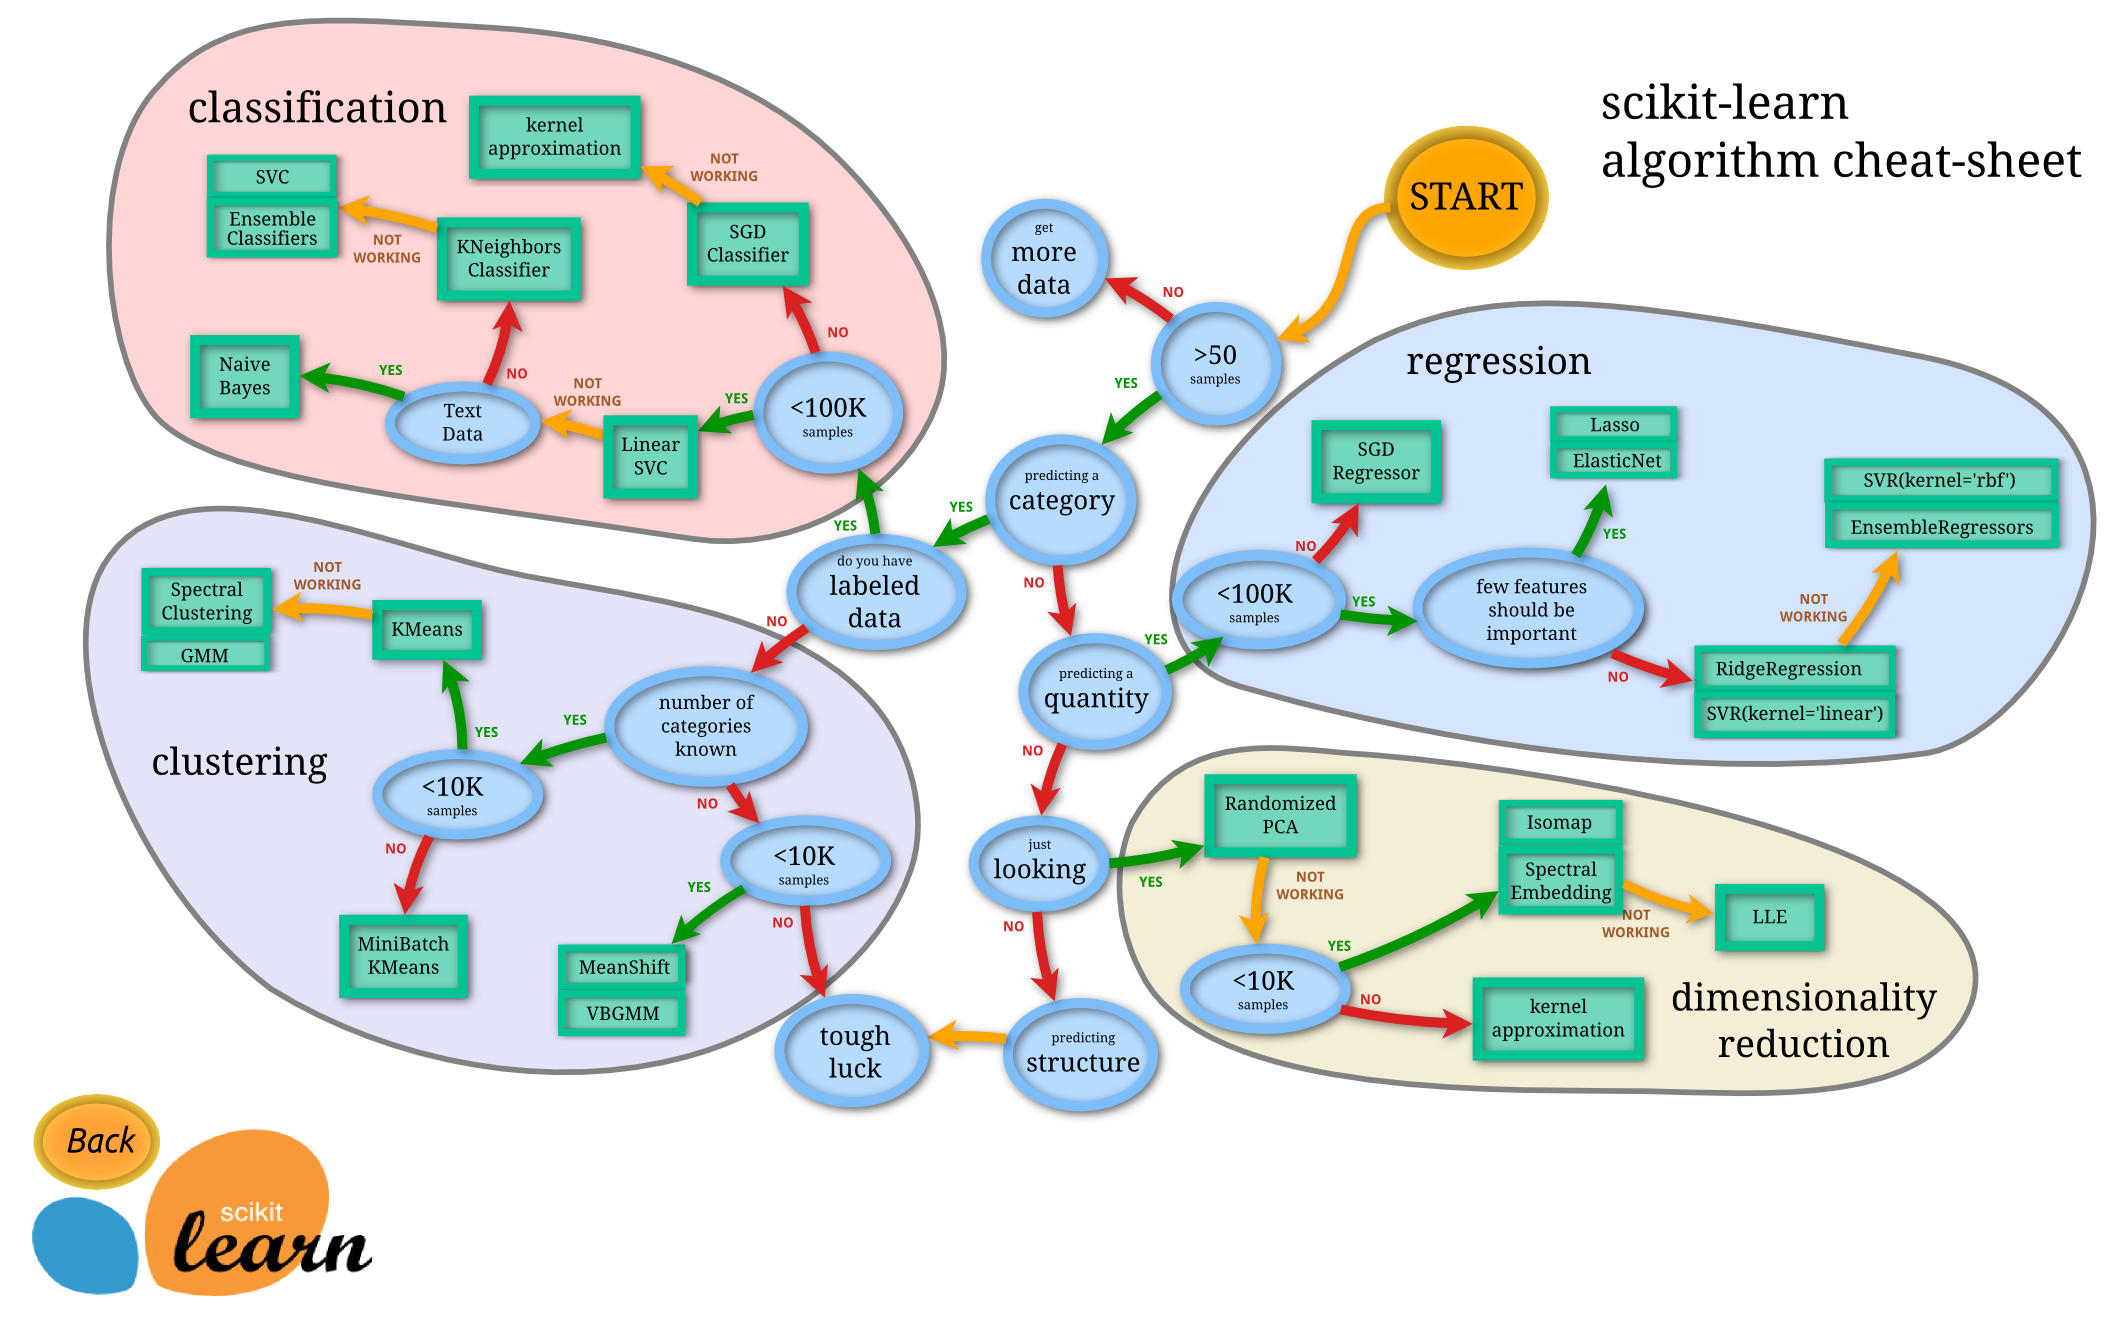

In [128]:
from IPython import display
display.Image("ml_map.png")

Link to ml map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

sklearn's data set link https://scikit-learn.org/stable/datasets.html

In [130]:
# Note: There are some datasets already provided by scikit learn to work, learn and experiments!
#  * One among them is Calfornia_housing data set

# Predicting a model for Regression problem

In [4]:
#Get california housing dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing() # hosuing class is linked to the dataset present in 
#                                     https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [5]:
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [228]:
# we have to use features to predict the target

In [6]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"]) # the data is in the form of dictonary
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [229]:
# target

housing_df["MedHouseVal"] = housing["target"]

In [230]:
housing_df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [183]:
housing_df.isna().sum(), housing_df.dtypes

(MedInc         0
 HouseAge       0
 AveRooms       0
 AveBedrms      0
 Population     0
 AveOccup       0
 Latitude       0
 Longitude      0
 MedHouseVal    0
 dtype: int64,
 MedInc         float64
 HouseAge       float64
 AveRooms       float64
 AveBedrms      float64
 Population     float64
 AveOccup       float64
 Latitude       float64
 Longitude      float64
 MedHouseVal    float64
 dtype: object)

In [212]:
X = housing_df.drop("MedHouseVal", axis = 1)
Y = housing_df.MedHouseVal

In [184]:
np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis = 1)
Y = housing_df.MedHouseVal #median house price in $100,000's

# regression model :--> Since predicting number

from sklearn.linear_model import Ridge
Reg = Ridge()

from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

Reg.fit(X_train, y_train)
#y_preds = Reg.predict(X_test)
Reg.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [20640, 950]

In [216]:
housing_df.to_csv("California_housing_dataset")

In [187]:
len(y)

950

In [9]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [192]:
X.shape

(20640, 8)

In [225]:
y.shape

(950,)

In [245]:
housing_df

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [234]:
len(housing_df["MedHouseVal"])

20640

In [239]:
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

len(X), len(y)

(20640, 20640)

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [244]:
len(X_train), len(y_train), len(X_test), len(y_test)

(16512, 16512, 4128, 4128)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()

In [246]:
## Ridge regression 

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5767742911399312

In [247]:
#  ensemble model :--> A combination of multiple smaller models beter predictions
# Random Regression
np.random.seed(40)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
Reg = RandomForestRegressor()
Reg.fit(X_train, y_train)
Reg.score(X_test, y_test) 

0.8147304084528268

# Predicting a model for Classification problem

In [8]:
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("scikit-learn-data/heart-disease.csv")
heart_disease.shape

(303, 14)

In [9]:
#LinearSVC
np.random.seed(32)

X = heart_disease.drop("target", axis = 1)
y = heart_disease.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8360655737704918

In [10]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
#RandomForestClassifier

np.random.seed(32)

X = heart_disease.drop("target", axis = 1)
y = heart_disease.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8360655737704918

# Note
* If you have structured data, use ensemble methods
* But for unstrutured (images,audio's,etc) data use Deep Learning or Dransfer learning

# Make predictions using Machine Learning Model\
1 .predict()

2 .predict_proba()

In [15]:
y_preds = clf.predict(X_test)

In [18]:
np.array(y_preds)

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [23]:
#Target label or ground-truth label

np.array(y_test)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [24]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8360655737704918

In [25]:
clf.score(X_test, y_test)

0.8360655737704918

 Note `score()` and `.mean(y_preds == y_test)` gives the same result

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8360655737704918

Three methods for score evalutaion of an estimator/model/algorithm

        * `.score()`
        
        * `np.mean(y_preds == y_test)`
        
        * `sklearn.metrics.accuracy_score(y_test,y_preds)`

# `predict_proba()`


In [29]:
#predict_proba() returns probabilities of a classification label
# like [how much % the patient has heart disease, will not have heart disease]

In [31]:
clf.predict_proba(X_test[:5]) # predicting for the 1st 5 inputs

array([[0.6 , 0.4 ],
       [0.85, 0.15],
       [0.39, 0.61],
       [0.3 , 0.7 ],
       [0.24, 0.76]])

In [32]:
clf.predict(X_test[:5])

array([0, 0, 1, 1, 1], dtype=int64)

In [1]:
#trying predicts on Regression Model
import pandas as pd
housing_df = pd.read_csv("California_housing_dataset.csv")

In [2]:
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [3]:
housing_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [4]:
housing_df.dtypes

MedInc         float64
HouseAge         int64
AveRooms       float64
AveBedrms      float64
Population       int64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [5]:
import numpy as np

np.random.seed(4)
X = housing_df.drop("MedHouseVal", axis =1)
y = housing_df.MedHouseVal

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

y_preds = model.predict(X_test) 

In [6]:
y_preds

array([1.62221  , 3.0119902, 1.23186  , ..., 2.9371001, 2.18025  ,
       1.01096  ])

In [7]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
6939,3.6875,36,5.327526,1.010453,1271,4.428571,33.99,-118.10
8032,4.2917,44,4.970930,0.968023,786,2.284884,33.83,-118.13
18877,2.4875,26,4.556477,1.033161,2539,2.631088,38.09,-122.23
4882,1.5652,38,3.161290,0.919355,1308,4.219355,34.02,-118.26
5409,4.2411,41,4.637450,1.055777,561,2.235060,34.03,-118.44
...,...,...,...,...,...,...,...,...
6634,6.0700,52,6.329317,0.959839,696,2.795181,34.16,-118.16
18858,1.0667,31,12.808511,3.255319,112,2.382979,41.50,-121.76
8910,2.5261,22,2.596674,1.004158,1106,2.299376,34.02,-118.48
9712,3.6875,19,4.979277,1.052072,4259,2.263018,36.66,-121.67


In [8]:
y_preds[:10]

array([1.62221  , 3.0119902, 1.23186  , 1.28604  , 3.4298719, 0.77595  ,
       2.57452  , 4.0462718, 1.4702   , 1.13855  ])

In [12]:
np.array(y_test[:10])

array([1.752  , 3.147  , 0.9    , 1.231  , 3.509  , 0.873  , 2.127  ,
       5.00001, 1.375  , 1.107  ])

In [13]:
len(y_preds), len(y_test)

(4128, 4128)

In [17]:
# compare the prediction to the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.3312958209060079

# Evaluating model
 Sklearn Learn models/estimators:
 
 1. score()
 2. scoring parameter
 3. Problem specififc metric functions
        
http://scikit-learn.org/stable/modules/model_evaluation.html

# Evaluting a model using the `scoring` paramter

In [52]:
heart_disease = pd.read_csv("scikit-learn-data/heart-disease (1).csv");
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(99)

X = heart_disease.drop("target", axis =1)
y = heart_disease.target

# from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
clf.score(X_test, y_test)

0.8524590163934426

In [17]:
cross_val_score(clf, X, y, cv = 5)

array([0.85245902, 0.8852459 , 0.80327869, 0.76666667, 0.76666667])

In [18]:
cross_val_score(clf, X, y, cv = 10)

array([0.90322581, 0.77419355, 0.87096774, 0.93333333, 0.9       ,
       0.76666667, 0.76666667, 0.83333333, 0.73333333, 0.8       ])

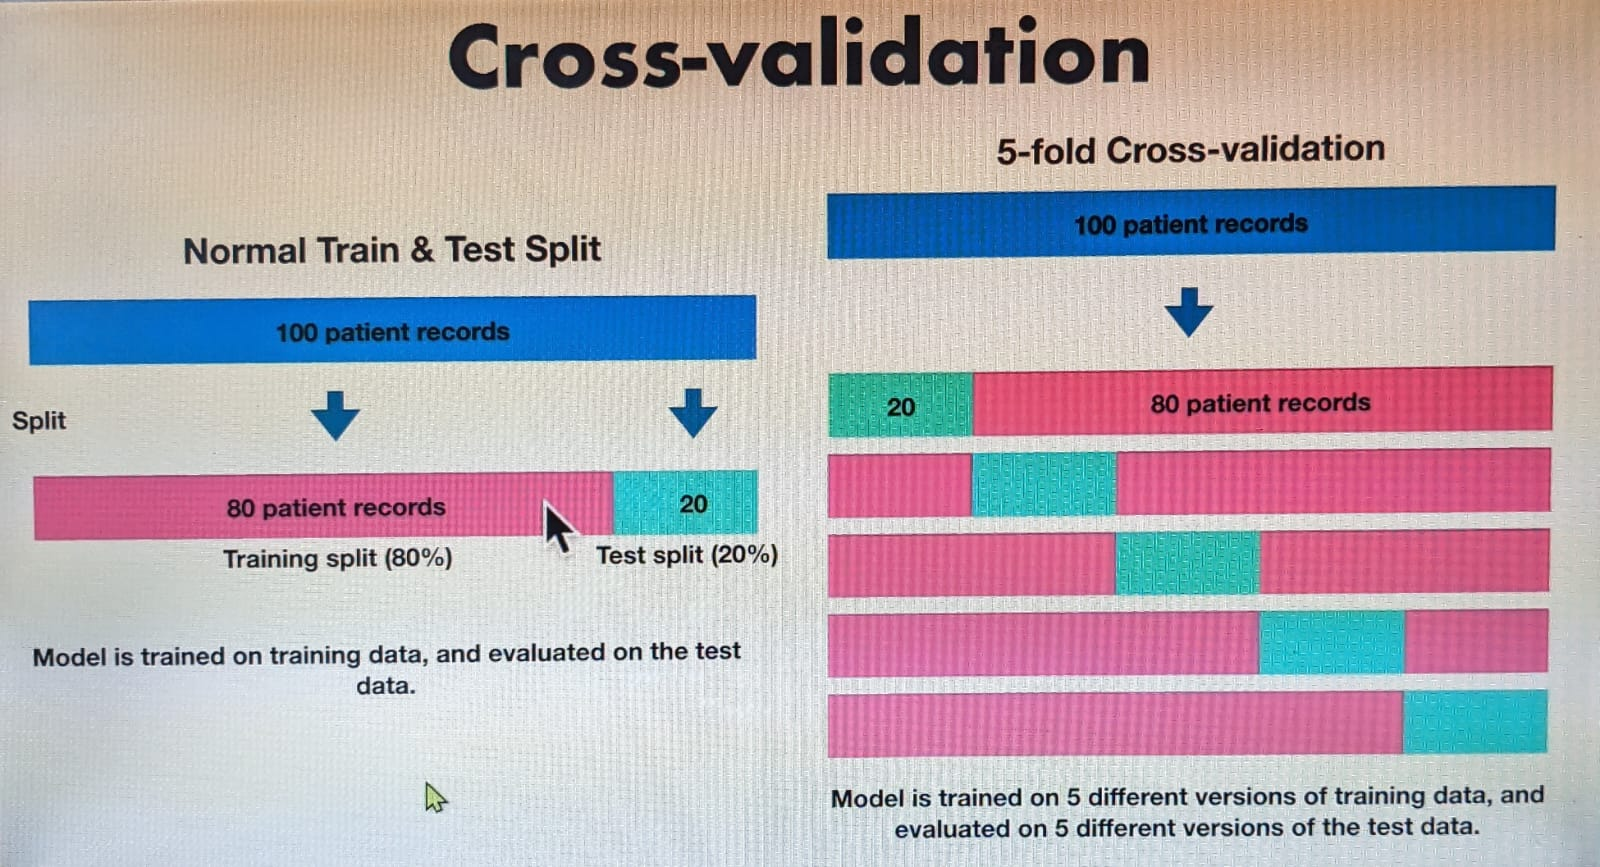

In [11]:
from IPython import display
display.Image("img/Cross-validation.jpg")

 Basically cross validation helps us to find the best split combination

In [23]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Default scoring parameter of classifier is `mean accuracy`

In [24]:
# Scoring parameter set to None by derfault
cross_val_score(clf,X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Classification model evaluation metric
1. Accuracy
2. Area under ROC curve
3. COnfusion matrix
4. Classification Report

**Accuracy**

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import numpy as np
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease.target

clf = RandomForestClassifier()


cross_val_score = cross_val_score(clf, X, y, cv = 5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [33]:
np.mean(cross_val_score)

0.8248087431693989

In [35]:
print(f"Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-validated Accuracy: 82.48%


**Area under Receiver Operating Characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve

ROC curve are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

**Success vs Failure**
* True positive is `model predicates 1 when truth is 1`
* False positive is `model predicts 1 when truth is 0`
* True negative is `model predicts 0 when truth is 0`
* False negative is `model predicts 0 when truth is 1`

In [46]:
# create train_test_split()

X_train, y_train, X_test, y_test = train_test_split(X,y, test_size=0.2)

In [51]:
y_train[:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3


In [55]:
from sklearn.metrics import roc_curve

#fit the model
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

# prints like [0,1]

array([[0.2 , 0.8 ],
       [0.98, 0.02],
       [0.27, 0.73],
       [0.17, 0.83],
       [0.02, 0.98],
       [0.41, 0.59],
       [0.04, 0.96],
       [0.23, 0.77],
       [0.88, 0.12],
       [0.47, 0.53]])

In [76]:
# y_probs[:,1] :--> slicing
#        [index, column]
y_probs_positive = y_probs[:, 1]

y_probs_positive # Since ROC compares Positive failure rate with the negative,
                # so we took the postive probability

array([0.8 , 0.02, 0.73, 0.83, 0.98, 0.59, 0.96, 0.77, 0.12, 0.53, 0.09,
       0.97, 0.07, 0.65, 0.99, 0.89, 1.  , 0.92, 0.36, 0.37, 0.8 , 0.87,
       0.33, 0.74, 0.09, 0.01, 0.96, 0.98, 0.62, 0.53, 0.12, 0.29, 0.95,
       0.23, 0.82, 0.57, 0.05, 0.45, 0.95, 0.84, 0.39, 0.62, 0.95, 0.1 ,
       0.96, 0.47, 0.79, 0.43, 0.45, 0.04, 0.4 , 0.83, 0.75, 0.11, 0.72,
       0.64, 0.3 , 0.7 , 0.11, 0.3 , 0.71])

In [61]:
# calculate fpr, tpr and thresholds
    
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#checking false positive rate, true positive rate, thresholds
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.08695652, 0.08695652, 0.13043478,
        0.17391304, 0.17391304, 0.2173913 , 0.2173913 , 0.34782609,
        0.34782609, 0.43478261, 0.43478261, 0.47826087, 0.65217391,
        0.69565217, 0.7826087 , 1.        ]),
 array([0.        , 0.02631579, 0.05263158, 0.10526316, 0.13157895,
        0.21052632, 0.26315789, 0.36842105, 0.42105263, 0.44736842,
        0.5       , 0.76315789, 0.78947368, 0.81578947, 0.81578947,
        0.84210526, 0.86842105, 0.89473684, 0.94736842, 0.94736842,
        0.97368421, 0.97368421, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.84, 0.83, 0.82, 0.8 ,
        0.64, 0.62, 0.59, 0.57, 0.53, 0.47, 0.45, 0.4 , 0.36, 0.33, 0.3 ,
        0.29, 0.23, 0.11, 0.1 , 0.09, 0.01]))

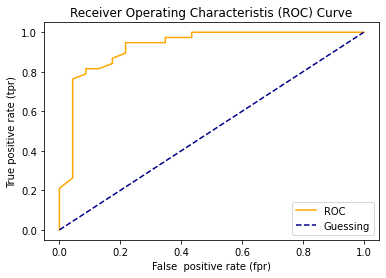

In [69]:
# creating function to plot ROC curve
%matplotlib inline
import matplotlib.pyplot as plt

def plot_ROC_curve(fpr, tpr):
    '''
    plots a ROC curve given false postive rate 
    and true positive rate
    '''
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    #plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle='--', label='Guessing')
    
    plt.xlabel("False  positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristis (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_ROC_curve(fpr, tpr)

In [72]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9273455377574371

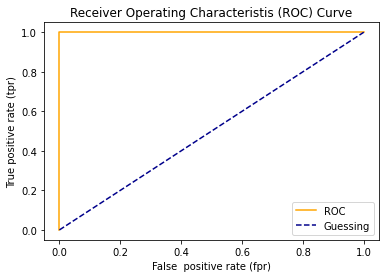

In [74]:
#perfect roc curve looks like
# we use y_test, y_test as inputs

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_ROC_curve(fpr, tpr)

In [78]:
roc_auc_score(y_test,y_test) #perfect score

1.0